# Applied Deep Learning Project: Multiclass Classification
## Fashion MNIST Classification using Neural Networks

### Project Overview
In this project, you will build a neural network to classify images of clothing items into 10 different categories.

**Learning Objectives:**
- Load and preprocess image data using Keras
- Build neural networks for multiclass classification
- Understand and implement categorical crossentropy loss
- Evaluate model performance using appropriate metrics
- Visualize training history and model predictions

**Dataset:** Fashion MNIST
- 60,000 training images
- 10,000 test images
- 10 classes of clothing items
- Grayscale images of size 28x28 pixels

## Section 1: Loading and Exploring the Dataset

### 1.1 Import Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers
from keras.datasets import fashion_mnist
from keras.utils import to_categorical



### 1.2 Loading the Fashion MNIST Dataset

Keras provides built-in access to the Fashion MNIST dataset. The `load_data()` function automatically downloads and loads the dataset, splitting it into training and test sets.

In [3]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define class names for the 10 categories
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)
print("\nNumber of classes:", len(class_names))
print("Class names:", class_names)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

Number of classes: 10
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### 1.3 Exploring the Dataset

**Task 1:** Examine the distribution of classes in the training set. Create a bar plot showing the number of samples in each class.

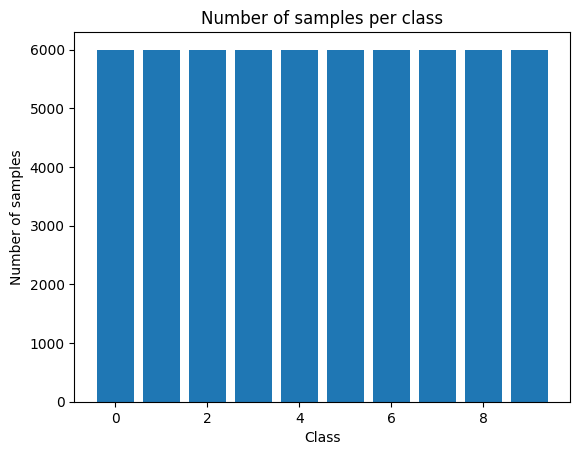

In [5]:
labels, counts = np.unique(train_labels, return_counts=True)

plt.figure()
plt.bar(labels, counts)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Number of samples per class')
plt.show()

### 1.4 Visualizing Sample Images

**Task 2:** Display a grid of 25 random images from the training set with their corresponding labels.

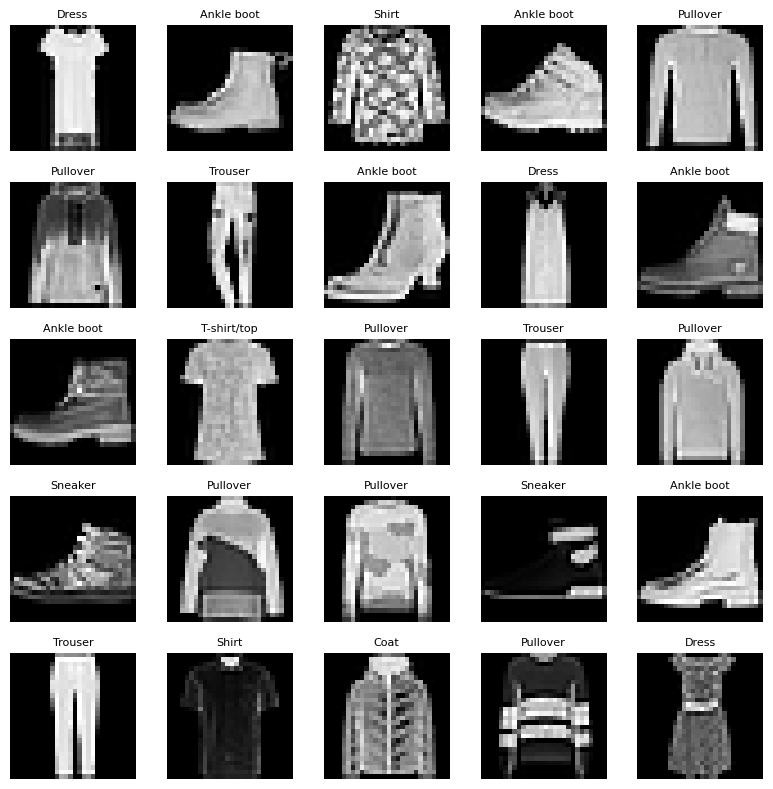

In [6]:
randoms = np.random.choice(len(train_images), 25, replace=False)

plt.figure(figsize=(8,8))

for i, random in enumerate(randoms):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[random], cmap='gray')
    plt.title(class_names[train_labels[random]], fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Section 2: Data Preprocessing

### 2.1 Reshaping and Normalizing the Data


1. Reshape the images into vectors (flatten)
2. Normalize pixel values to the [0, 1] range
3. Prepare labels for categorical classification

In [ ]:
# Examine the current data type and range
print("Original data type:", train_images.dtype)
print("Original value range: [{}, {}]".format(train_images.min(), train_images.max()))
print("Original shape:", train_images.shape)

Original data type: uint8
Original value range: [0, 255]
Original shape: (60000, 28, 28)


**Task 3:** Preprocess the training and test images:
- Reshape from (num_samples, 28, 28) to (num_samples, 784)
- Convert to float32 data type
- Scale pixel values to [0, 1] range

In [7]:
num_samples = train_images.shape[0]

X_train = train_images.reshape(num_samples, -1) \
                      .astype('float32') / 255.0

print("New shape:", X_train.shape)
print("New dtype:", X_train.dtype)
print("New value range:", X_train.min(), X_train.max())


New shape: (60000, 784)
New dtype: float32
New value range: 0.0 1.0


### 2.2 Preparing Labels for Multiclass Classification

For multiclass classification with categorical crossentropy, we need to convert labels to one-hot encoded vectors.

**Task 4**: Convert the labels to categorical (one-hot encoded) format using `to_categorical()` and verify the encoding



In [8]:
num_classes = 10

y_train_cat = to_categorical(train_labels, num_classes)
y_test_cat  = to_categorical(test_labels,  num_classes)

print("Original train_labels shape:", train_labels.shape)
print("One-hot y_train_cat shape:", y_train_cat.shape)
print("Original test_labels shape:", test_labels.shape)
print("One-hot y_test_cat shape:", y_test_cat.shape)

print("First 5 raw labels:", train_labels[:5])
print("First 5 one-hot rows:\n", y_train_cat[:5])


Original train_labels shape: (60000,)
One-hot y_train_cat shape: (60000, 10)
Original test_labels shape: (10000,)
One-hot y_test_cat shape: (10000, 10)
First 5 raw labels: [9 0 0 3 0]
First 5 one-hot rows:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Section 3: Building the Neural Network Model

### 3.1 Model Architecture Design



**Task 5:** Build a Sequential model with two hidden layers:
- First hidden layer: 512 units, ReLU activation
- Second hidden layer: 256 units, ReLU activation


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

num_classes = 10
input_dim   = 784

model = Sequential([
    Dense(512, activation='relu', input_shape=(input_dim,)),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])


### 3.2 Model Summary

Display the model architecture and calculate the total number of trainable parameters.

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

**Question:**  How many total parameters does your model have? Calculate manually for each layer and calculate the total:
- Layer 1: 784 X 512 + 512 = 401920
- Layer 2: 512 X 256 + 256 = 131328
- Layer 3: 256 X 10 + 10 = 2570
- **Total:** 401920 + 131328 + 2570 = 535818

## Section 4: Compiling and Training the Model

### 4.1 Model Compilation

**Task 6:** Compile the model with:
- **Optimizer:** RMSprop with learning rate 0.001
- **Loss:** Categorical crossentropy (for one-hot encoded labels)
- **Metrics:** Accuracy

In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='categorical_crossentropy',  # for one-hot encoded labels
    metrics=['accuracy']
)

### 4.2 Creating a Validation Set

**Task 7:** Set aside 10,000 samples from the training data for validation.

In [14]:
values = 10000
X_values= X_train[:values]
X_train_final= X_train[values:]

y_values= y_train_cat[:values]
y_train_final= y_train_cat[values:]

print("Training data shape:", X_train_final.shape, y_train_final.shape)
print("Validation data shape:", X_values.shape, y_values.shape)


Training data shape: (50000, 784) (50000, 10)
Validation data shape: (10000, 784) (10000, 10)


### 4.3 Training the Model

**Task 8:** Train the model for 20 epochs with batch size 128, using the validation set to monitor performance.

In [15]:
EPOCHS = 20
BATCH_SIZE = 128

history = model.fit(
    X_train_final, y_train_final,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_values, y_values)
)


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7288 - loss: 0.7619 - val_accuracy: 0.7896 - val_loss: 0.5811
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8484 - loss: 0.4058 - val_accuracy: 0.8569 - val_loss: 0.3883
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8712 - loss: 0.3458 - val_accuracy: 0.8593 - val_loss: 0.3874
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8814 - loss: 0.3170 - val_accuracy: 0.8600 - val_loss: 0.3775
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8896 - loss: 0.2915 - val_accuracy: 0.8732 - val_loss: 0.3488
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8945 - loss: 0.2761 - val_accuracy: 0.8856 - val_loss: 0.3206
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8990 - loss: 0.2669 - val_accuracy: 0.8899 - val_loss: 0.3111
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9040 - loss: 0.2553 - val_accuracy: 0

## Section 5: Evaluating Model Performance

### 5.1 Plotting Training History

**Task 9:** Create two plots:
1. Training and validation loss over epochs
2. Training and validation accuracy over epochs

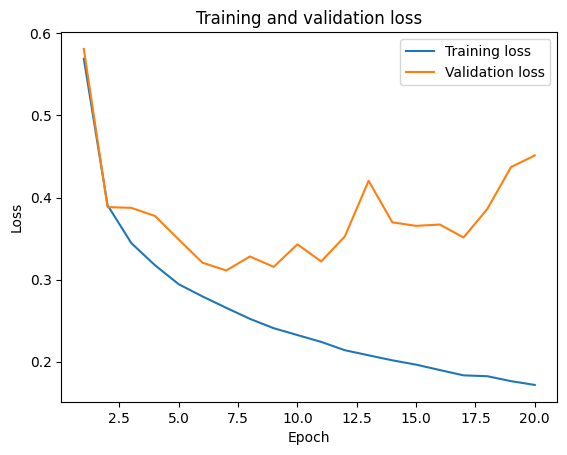

In [17]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure()
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

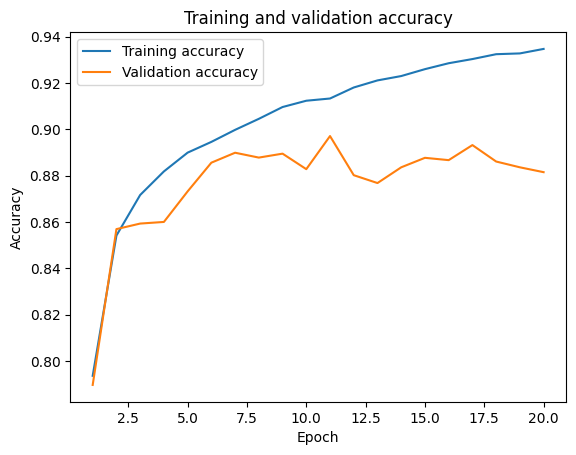

In [18]:
plt.figure()
plt.plot(epochs, train_acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

**Analysis Questions:**
1. At what epoch does overfitting begin to occur?
at Epoch 2.5
2. What is the best validation accuracy achieved?
about 0.9
3. Is there a significant gap between training and validation accuracy?
Not necesssarily, it still remains less than 0.2 away.

### 5.2 Testing on Test Set

**Task 10:** Evaluate the model on the test set and report the test loss and accuracy.

In [20]:
from tensorflow.keras.utils import to_categorical

num_test = test_images.shape[0]
X_test = test_images.reshape(num_test, -1).astype('float32') / 255.0

y_test_cat = to_categorical(test_labels, num_classes=10)

test_loss, test_acc = model.evaluate(X_test, y_test_cat, batch_size=128)

print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8761 - loss: 0.4716
Test loss: 0.4982803165912628
Test accuracy: 0.8726000189781189


### 5.3 Confusion Matrix

**Task 10(bonus):** Generate predictions for the test set and create a confusion matrix to analyze misclassifications.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# TODO: Generate predictions
# Your code here
predictions = None

# TODO: Create and visualize confusion matrix
# Your code here


**Analysis Questions:**
1. Which classes are most commonly confused with each other?
2. Which class has the highest accuracy?
3. Which class has the lowest accuracy?

## Section 6: Model Improvement Experiments

### 6.1 Experiment with Different Architectures

**Task 11:** Try at least two of the following modifications and build a new network and compare results:

1. **Deeper network:** Add more hidden layers
2. **Wider network:** Increase the number of units per layer
3. **Different Optimizer:** Try adam or different optimizer
4. **Different activation:** Try tanh or other activation functions


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop, Adam

num_classes = 10
input_dim = 784

model_deeper = Sequential([
    Dense(512, activation='relu', input_shape=(input_dim,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),      # extra hidden layer
    Dense(num_classes, activation='softmax')
])

model_deeper.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_deeper = model_deeper.fit(
    X_train_final, y_train_final,
    epochs=20,
    batch_size=128,
    validation_data=(X_values, y_values)
)

test_loss_deeper, test_acc_deeper = model_deeper.evaluate(X_test, y_test_cat, batch_size=128)
print("Deeper net - test loss:", test_loss_deeper, "test acc:", test_acc_deeper)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7074 - loss: 0.7976 - val_accuracy: 0.8256 - val_loss: 0.4723
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4177 - val_accuracy: 0.8562 - val_loss: 0.3915
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8668 - loss: 0.3576 - val_accuracy: 0.8404 - val_loss: 0.4071
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8785 - loss: 0.3229 - val_accuracy: 0.8785 - val_loss: 0.3347
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8866 - loss: 0.3043 - val_accuracy: 0.8819 - val_loss: 0.3209
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8932 - loss: 0.2824 - val_accuracy: 0.8687 - val_loss: 0.3574
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8992 - loss: 0.2644 - val_accuracy: 0.8815 - val_loss: 0.3373
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9034 - loss: 0.2576 - val_accuracy: 0.8924 -

In [22]:
model_wider_adam = Sequential([
    Dense(1024, activation='relu', input_shape=(input_dim,)),  # wider
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_wider_adam.compile(
    optimizer=Adam(learning_rate=0.001),   # different optimizer
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_wider_adam = model_wider_adam.fit(
    X_train_final, y_train_final,
    epochs=20,
    batch_size=128,
    validation_data=(X_values, y_values)
)

test_loss_wider, test_acc_wider = model_wider_adam.evaluate(X_test, y_test_cat, batch_size=128)
print("Wider+Adam - test loss:", test_loss_wider, "test acc:", test_acc_wider)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.7753 - loss: 0.6402 - val_accuracy: 0.8683 - val_loss: 0.3701
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8637 - loss: 0.3645 - val_accuracy: 0.8676 - val_loss: 0.3574
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8819 - loss: 0.3224 - val_accuracy: 0.8792 - val_loss: 0.3290
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8893 - loss: 0.2973 - val_accuracy: 0.8819 - val_loss: 0.3185
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8969 - loss: 0.2773 - val_accuracy: 0.8892 - val_loss: 0.3083
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9024 - loss: 0.2594 - val_accuracy: 0.8846 - val_loss: 0.3172
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9088 - loss: 0.2439 - val_accuracy: 0.8850 - val_loss: 0.3105
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9092 - loss: 0.2369 - val_accuracy: 0.89

In [23]:
model_tanh = Sequential([
    Dense(512, activation='tanh', input_shape=(input_dim,)),
    Dense(256, activation='tanh'),
    Dense(num_classes, activation='softmax')
])

model_tanh.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_tanh = model_tanh.fit(
    X_train_final, y_train_final,
    epochs=20,
    batch_size=128,
    validation_data=(X_values, y_values)
)

test_loss_tanh, test_acc_tanh = model_tanh.evaluate(X_test, y_test_cat, batch_size=128)
print("tanh net - test loss:", test_loss_tanh, "test acc:", test_acc_tanh)


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7179 - loss: 0.8294 - val_accuracy: 0.8110 - val_loss: 0.4978
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8426 - loss: 0.4262 - val_accuracy: 0.8313 - val_loss: 0.4412
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8622 - loss: 0.3664 - val_accuracy: 0.8540 - val_loss: 0.3838
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8772 - loss: 0.3259 - val_accuracy: 0.8755 - val_loss: 0.3426
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8836 - loss: 0.3105 - val_accuracy: 0.8631 - val_loss: 0.3590
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8907 - loss: 0.2890 - val_accuracy: 0.8760 - val_loss: 0.3334
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8972 - loss: 0.2734 - val_accuracy: 0.8558 - val_loss: 0.3787
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9009 - loss: 0.2619 - val_accuracy: 0.

### 6.2 Compare Model Performance

**Task 12:**  Compare the performance of the two models that you trained.


## Submission Guidelines

Please submit:
1. This completed Jupyter notebook with all code cells executed
2. All outputs visible (plots, metrics, etc.)
3. Your written answers to analysis questions in the same Jupyter notebook
4. A brief summary (1 paragraph) of your best performing model and why you think it worked well




The wider network with Adam is the best-performing model, achieving the highest test accuracy (about 89.27%) while also keeping a low test loss, meaning both strong classification performance and good confidence calibration. Wide layers means it gives greater representational capacity than the baseline or deeper variant, allowing it to capture more complex patterns in Fashion MNIST without overfitting too heavily, and the Adam optimizer generally converges faster and more effectively than RMSprop for this network, which likely helped it reach a better outcome within the same number of epochs